In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('data-kmeans.csv')
data = dataset.values

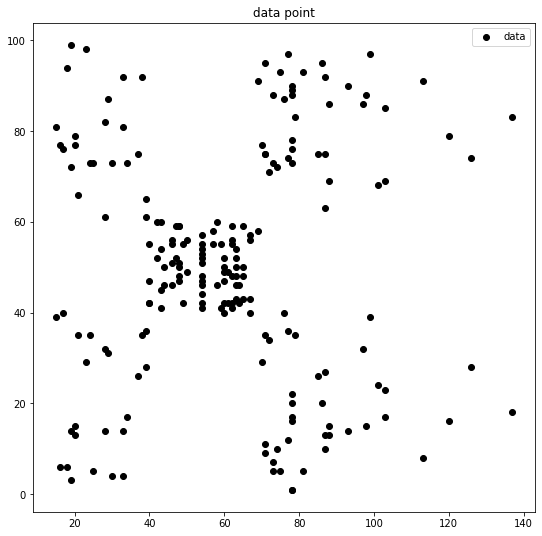

In [18]:
n = data.shape[0]

x1 = data[:,0]
x2 = data[:,1]

plt.figure(1,figsize=(9,9))
plt.scatter(x1, x2, c='k', label='data')
plt.title('data point')
plt.legend()
plt.show()

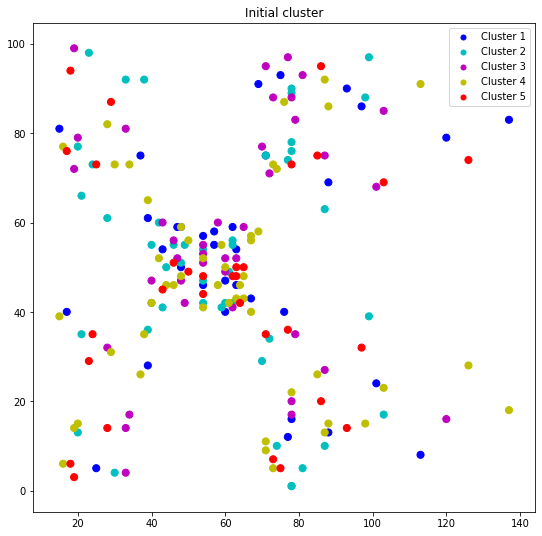

In [26]:
k = 5 # number of cluster

labels = np.zeros(n) # initial cluster

for i in range(n):
    labels[i] = np.random.randint(k)
    
label_1 = (labels==0)
label_2 = (labels==1)
label_3 = (labels==2)
label_4 = (labels==3)
label_5 = (labels==4)
    
plt.figure(2,figsize=(9,9))
plt.scatter(x1, x2, s=label_1*50, c='b', label='Cluster 1')
plt.scatter(x1, x2, s=label_2*50, c='c', label='Cluster 2')
plt.scatter(x1, x2, s=label_3*50, c='m', label='Cluster 3')
plt.scatter(x1, x2, s=label_4*50, c='y', label='Cluster 4')
plt.scatter(x1, x2, s=label_5*50, c='r', label='Cluster 5')
plt.title('Initial cluster')
plt.legend()
plt.show()

In [ ]:
def compute_distance(a, b):

    dist = #distance between a and b#

    return dist

In [ ]:
def compute_centroid(Z):

    center = #centroid of a set of points in P#
    
    return center

In [ ]:
def compute_label(z, M):

    label = #label of point z with a set of centroids M#
    
    return label

In [ ]:
def compute_loss(C, M):

    loss = #compute loss#
    
    return loss

## 1. Plot the data points [1pt]

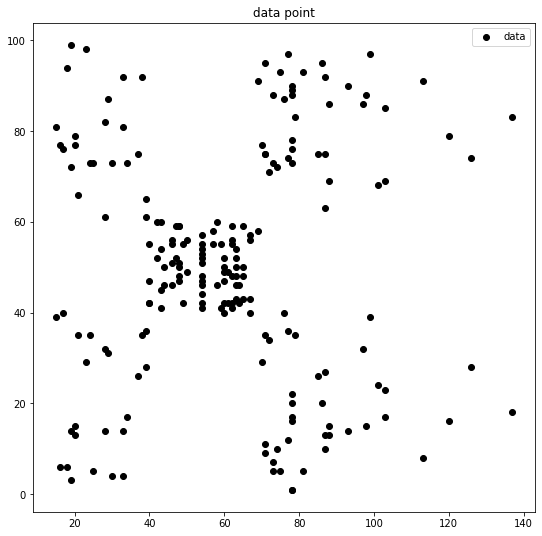

In [19]:
plt.figure(1,figsize=(9,9))
plt.scatter(x1, x2, c='k', label='data')
plt.title('data point')
plt.legend()
plt.show()

## 2. Visualise the initial condition of the point labels [1pt]

## 3. Plot the loss curve [5pt]

## 4. Plot the centroid of each clsuter [5pt]

## 5. Plot the final clustering result [5pt]